# **Importing Neccessary Modules**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize

2025-05-03 18:08:21.398803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746295701.568084      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746295701.616571      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Data Loading & EDA**

In [3]:
classes, class_paths = zip(*[(label, os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', label, image))
                             for label in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training') if os.path.isdir(os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', label))
                             for image in os.listdir(os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', label))])

tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
tr_df

Class Path      Class
0     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
1     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
2     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
3     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
4     /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
...                                                 ...        ...
5707  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5708  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5709  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5710  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma
5711  /kaggle/input/brain-tumor-mri-dataset/Training...     glioma

[5712 rows x 2 columns]

In [4]:
classes, class_paths = zip(*[(label, os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', label, image))
                             for label in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing') if os.path.isdir(os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', label))
                             for image in os.listdir(os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', label))])

ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
ts_df

Class Path      Class
0     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
1     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
2     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
3     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
4     /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
...                                                 ...        ...
1306  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1307  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1308  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1309  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma
1310  /kaggle/input/brain-tumor-mri-dataset/Testing/...     glioma

[1311 rows x 2 columns]

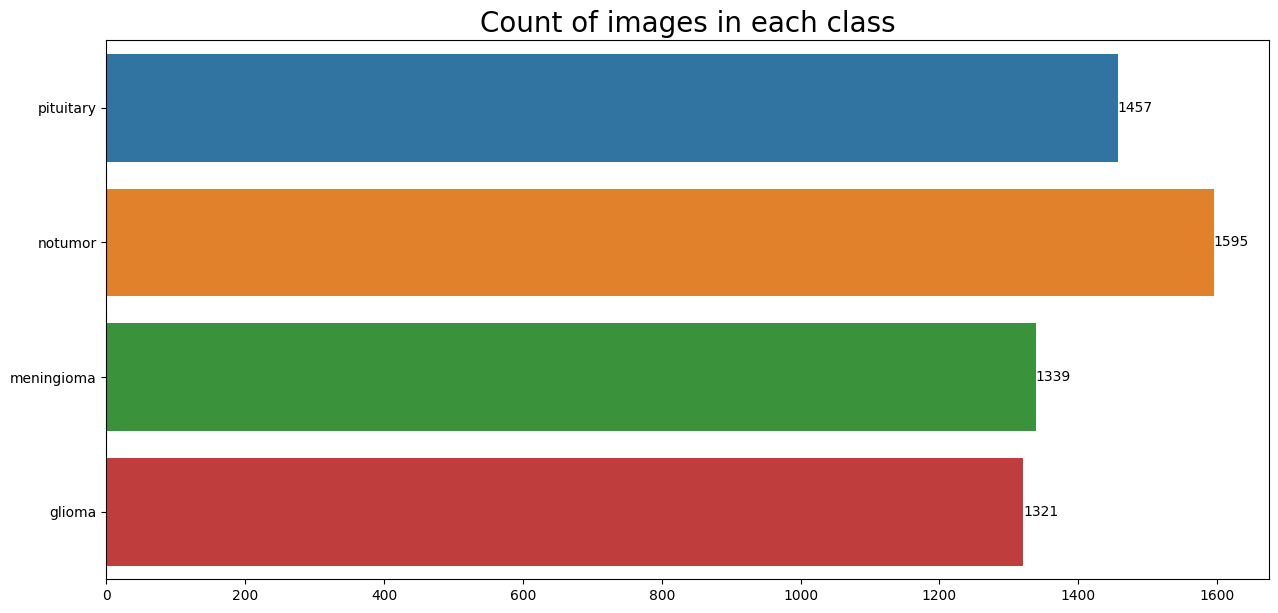

In [5]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

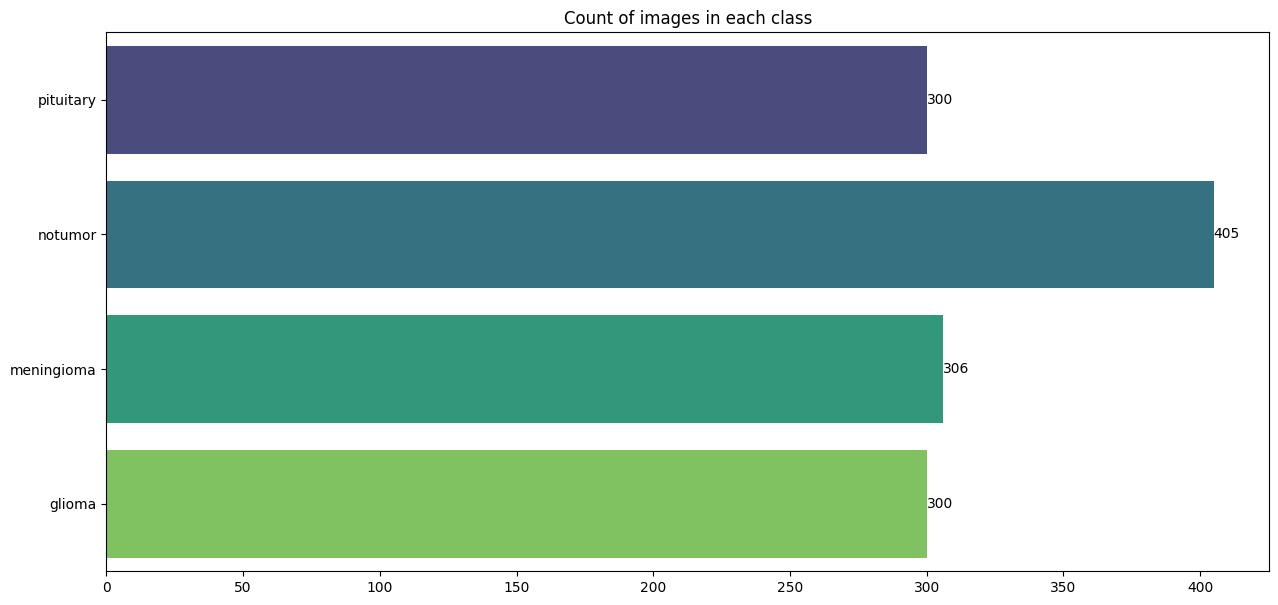

In [6]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [7]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [8]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


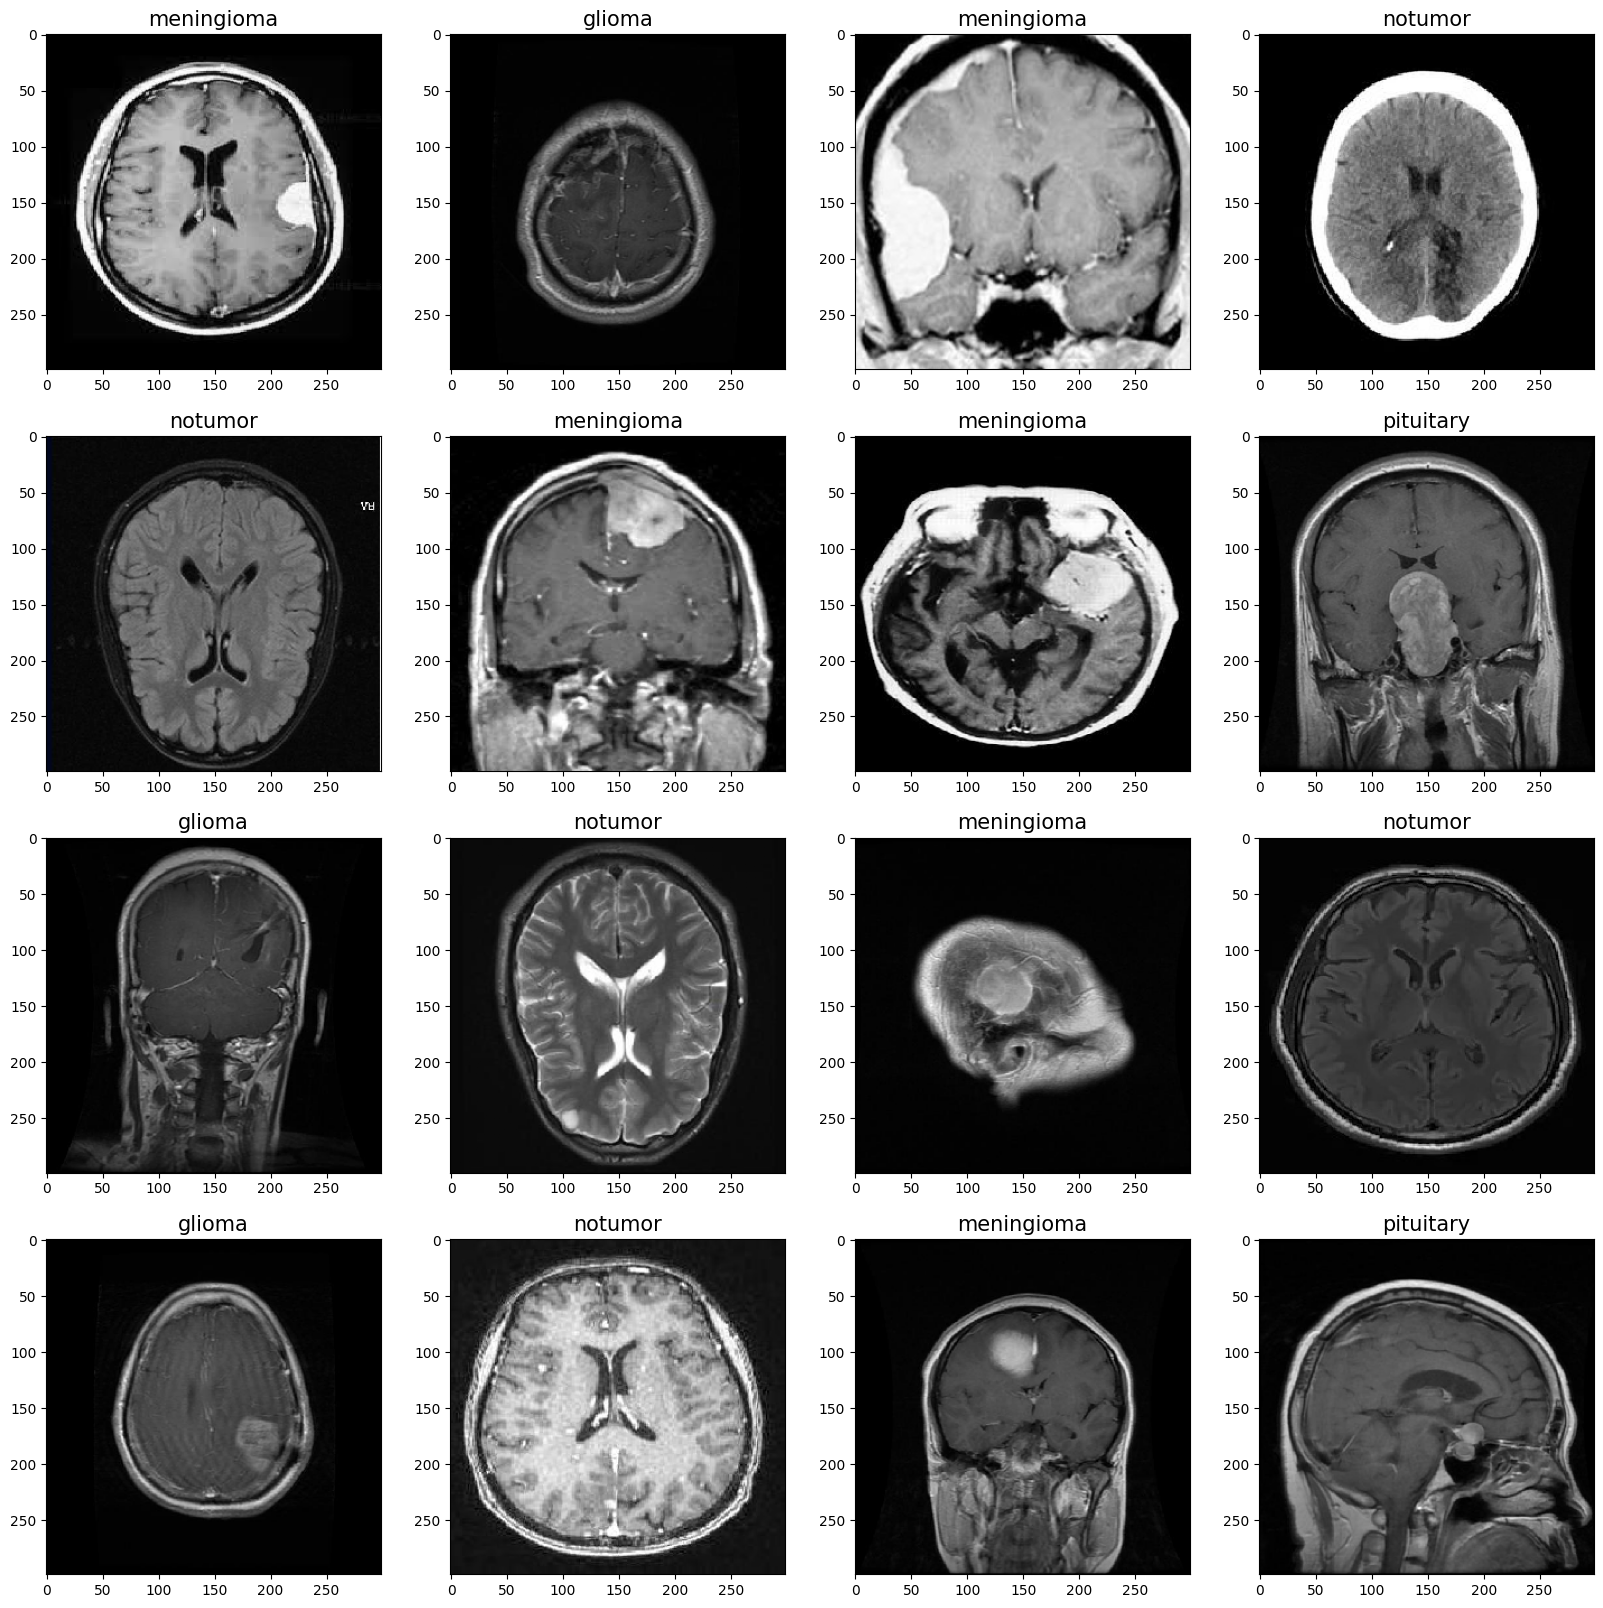

In [9]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

# **Using Xception As Our Feature Extractor**

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [11]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [12]:
img_shape=(299,299,3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)

# Functional API
x = base_model.output
x = Flatten()(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.25)(x)
outputs = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)


# Compile the model
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()],
)

# Print model summary
model.summary()

I0000 00:00:1746295724.642746      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.757513 to fit



In [14]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 callbacks = callbacks,
                 shuffle= False)

Epoch 1/10


I0000 00:00:1746295770.391037      97 service.cc:148] XLA service 0x7c349c014d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746295770.391750      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746295772.888128      97 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1746295789.118880      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295789.359447      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295790.758010      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295791.0035

178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7657 - loss: 0.6568 - precision: 0.8360 - recall: 0.6787

E0000 00:00:1746295892.250262      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295892.460935      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295893.605610      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295893.842267      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295894.766843      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.7664 - loss: 0.6550 - precision: 0.8365 - recall: 0.6796

E0000 00:00:1746295917.823317      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295918.064218      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295918.597089      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746295918.860746      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.



Epoch 1: val_accuracy improved from -inf to 0.95573, saving model to best_model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 184s 664ms/step - accuracy: 0.7670 - loss: 0.6532 - precision: 0.8369 - recall: 0.6805 - val_accuracy: 0.9557 - val_loss: 0.1324 - val_precision: 0.9568 - val_recall: 0.9466 - learning_rate: 0.0010
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9807 - loss: 0.0605 - precision: 0.9824 - recall: 0.9778
Epoch 2: val_accuracy improved from 0.95573 to 0.97405, saving model to best_model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 466ms/step - accuracy: 0.9807 - loss: 0.0605 - precision: 0.9824 - recall: 0.9778 - val_accuracy: 0.9740 - val_loss: 0.0836 - val_precision: 0.9785 - val_recall: 0.9725 - learning_rate: 0.0010
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9905 - loss: 0.0323 - precision: 0.9905 - recall: 0.9888
Epoch 3: val_accuracy improved from 0.97405 to 0.98626, saving model to best_model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s

# **Xception Results Plotting**

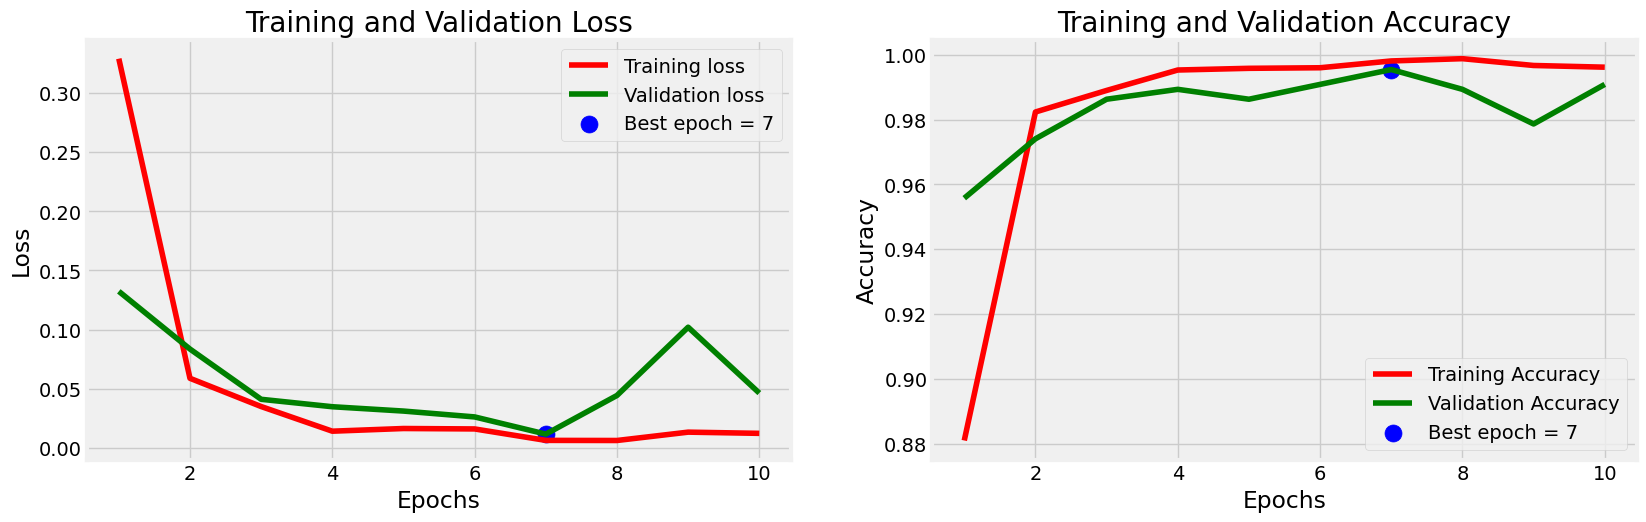

In [15]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [16]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 223ms/step - accuracy: 0.9998 - loss: 9.3082e-04 - precision: 0.9998 - recall: 0.9998
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.9945 - loss: 0.0171 - precision: 0.9945 - recall: 0.9945
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9957 - loss: 0.0128 - precision: 0.9957 - recall: 0.9957
Train Loss: 0.0010
Train Accuracy: 99.96%
--------------------
Validation Loss: 0.0138
Validation Accuracy: 99.54%
--------------------
Test Loss: 0.0328
Test Accuracy: 99.24%


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step


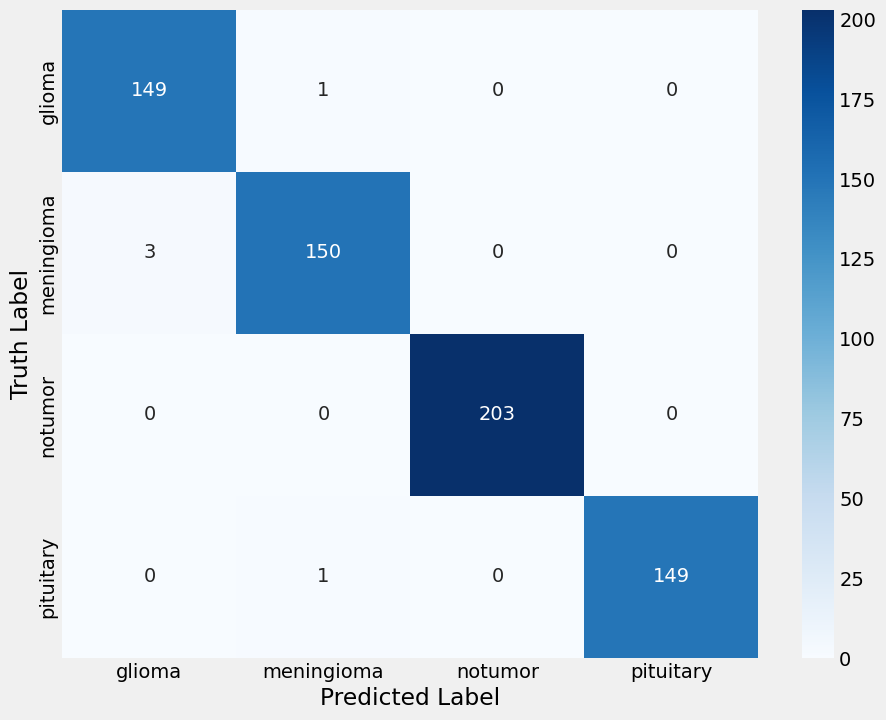

In [17]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [18]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       150
           1       0.99      0.98      0.98       153
           2       1.00      1.00      1.00       203
           3       1.00      0.99      1.00       150

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



# **Feature Extraction**

In [19]:
for layer in model.layers:
    print(layer.name)

input_layer
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d
block2_pool
batch_normalization
add
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_1
block3_pool
batch_normalization_1
add_1
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_2
block4_pool
batch_normalization_2
add_2
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_3
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_4
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
block7_sepco

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.feature_selection import SelectFromModel

In [21]:
data_dir = "/kaggle/input/brain-tumor-mri-dataset/"
train_path = os.path.join(data_dir, "Training")
test_path = os.path.join(data_dir, "Testing")
img_size = (299, 299)
batch_size = 16  # Small batch size to reduce memory usage
num_classes = 4

# Load all images and labels into memory
all_images = []
all_labels = []
class_names = sorted(os.listdir(train_path))  # ['glioma', 'meningioma', 'notumor', 'pituitary']
print("Loading images...")
for class_idx, class_name in enumerate(class_names):
    train_class_path = os.path.join(train_path, class_name)
    for img_name in os.listdir(train_class_path):
        img_path = os.path.join(train_class_path, img_name)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        all_images.append(img_array)
        all_labels.append(class_idx)
    test_class_path = os.path.join(test_path, class_name)
    for img_name in os.listdir(test_class_path):
        img_path = os.path.join(test_class_path, img_name)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        all_images.append(img_array)
        all_labels.append(class_idx)

# Convert to NumPy arrays
all_images = np.array(all_images, dtype='float16')
all_labels = np.array(all_labels)
print(f"Loaded {all_images.shape[0]} images with shape {all_images.shape[1:]}")

Loading images...
Loaded 7023 images with shape (299, 299, 3)


In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

print(f"Training set: {X_train.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")

Training set: 5618 images
Test set: 1405 images


In [24]:
import gc
del all_images, all_labels


In [25]:
gc.collect()

14407

In [26]:
feature_extractor = Model(inputs=model.input, outputs=model.layers[-5].output)  # Extract features before last Dense

In [27]:
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)

175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

E0000 00:00:1746296805.780405      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746296806.021352      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

E0000 00:00:1746296820.738908      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746296820.984501      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746296821.648565      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746296821.918162      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step


# **Feature Selection and Engineering**

In [28]:
# Scale the features
scaler = StandardScaler()
X_train_features = scaler.fit_transform(train_features)
X_test_features = scaler.transform(test_features)

In [29]:
rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_feature_selector.fit(X_train_features, y_train)
selector = SelectFromModel(rf_feature_selector, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train_features)
X_test_selected = selector.transform(X_test_features)
print(f"Random Forest Reduced Shape: {X_train_selected.shape}")

# Free memory
del train_features, test_features, X_train_features, X_test_features
gc.collect()

Random Forest Reduced Shape: (5618, 2048)


1122

In [30]:
methods = {
    'Random Forest': X_train_selected,
    'Decision Trees': None,
    'Z-score': None,
    'Random Forest Gini': None
}

In [31]:
# Decision Trees Feature Selection
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train_selected, y_train)
dt_importances = dt.feature_importances_
dt_indices = np.argsort(dt_importances)[::-1][:1000]
methods['Decision Trees'] = X_train_selected[:, dt_indices]

In [32]:
# Z-score Feature Selection
z_scores = np.abs(zscore(X_train_selected, axis=0))
mean_z_scores = np.mean(z_scores, axis=0)
z_indices = np.argsort(mean_z_scores)[::-1][:1000]
methods['Z-score'] = X_train_selected[:, z_indices]

In [33]:
# Random Forest Gini Feature Selection
rf_gini = RandomForestClassifier(n_estimators=100, random_state=42)
rf_gini.fit(X_train_selected, y_train)
rf_gini_importances = rf_gini.feature_importances_
rf_gini_indices = np.argsort(rf_gini_importances)[::-1][:1000]
methods['Random Forest Gini'] = X_train_selected[:, rf_gini_indices]

In [34]:
results = {}
for method, X_train_method in methods.items():
    X_test_method = (X_test_selected[:, rf_gini_indices] if method == 'Random Forest Gini'
                     else X_test_selected[:, dt_indices] if method == 'Decision Trees'
                     else X_test_selected[:, z_indices] if method == 'Z-score'
                     else X_test_selected)
    svm = SVC(kernel='rbf', random_state=42, class_weight='balanced')
    svm.fit(X_train_method, y_train)
    y_pred = svm.predict(X_test_method)
    accuracy = accuracy_score(y_test, y_pred)
    results[method] = accuracy
    print(f"{method} SVM Accuracy: {accuracy:.4f}")

Random Forest SVM Accuracy: 0.9979
Decision Trees SVM Accuracy: 0.9979
Z-score SVM Accuracy: 0.9979
Random Forest Gini SVM Accuracy: 0.9979


In [35]:
best_method = max(results, key=results.get)
X_train_best = methods[best_method]
X_test_best = (X_test_selected[:, rf_gini_indices] if best_method == 'Random Forest Gini'
               else X_test_selected[:, dt_indices] if best_method == 'Decision Trees'
               else X_test_selected[:, z_indices] if best_method == 'Z-score'
               else X_test_selected)

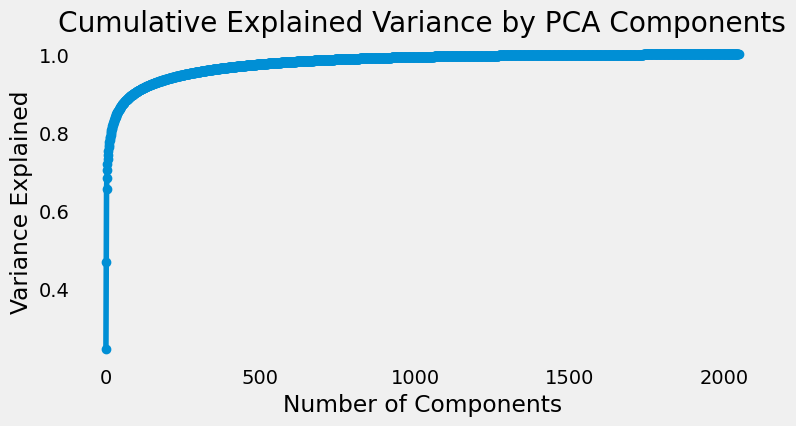

Optimal PCA components: 266


In [36]:
# Determine optimal PCA components
pca = PCA()
pca.fit(X_train_best)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.savefig('/kaggle/working/pca_elbow.png')
plt.show()
plt.close()

# Choose optimal components (e.g., where variance > 95%)
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal PCA components: {optimal_components}")

# Apply PCA
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train_best)
X_test_pca = pca.transform(X_test_best)


# **SVM Training with Hyperparameter Tuning**

In [37]:
# Hyperparameter Tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.001]}
grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability = True), param_grid, cv=3)
grid.fit(X_train_pca, y_train)
print("Best SVM Parameters:", grid.best_params_)
svm = grid.best_estimator_

# Train and evaluate final SVM|
svm.fit(X_train_pca, y_train)
y_pred_final = svm.predict(X_test_pca)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final SVM Accuracy with Best Method + PCA:", final_accuracy)
print("Final SVM Classification Report:\n", classification_report(y_test, y_pred_final, target_names=class_names))

Best SVM Parameters: {'C': 10, 'gamma': 'scale'}
Final SVM Accuracy with Best Method + PCA: 0.997864768683274
Final SVM Classification Report:
               precision    recall  f1-score   support

      glioma       0.99      1.00      1.00       324
  meningioma       1.00      0.99      1.00       329
     notumor       1.00      1.00      1.00       400
   pituitary       1.00      1.00      1.00       352

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



# **Interpretability and XAI Techhniques and Result Analysis**

**AUC-ROC Curve for Final SVM**


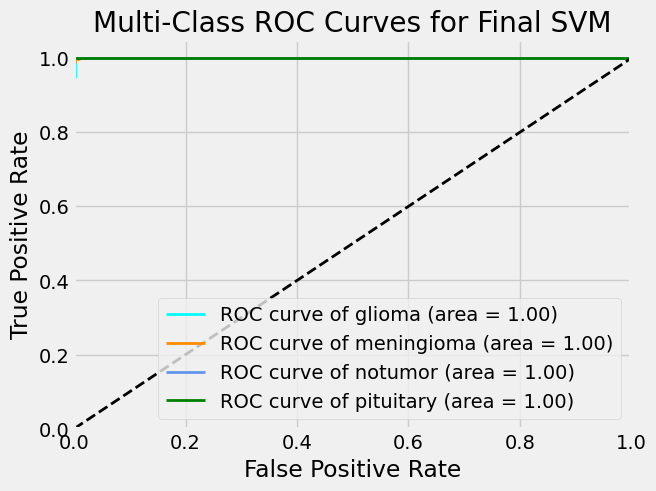

In [38]:
y_score = svm.decision_function(X_test_pca)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves for Final SVM')
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/multi_class_roc_curves.png')
plt.show()
plt.close()

In [39]:
import lime
from lime import lime_tabular
import shap

 **LIME Explanations (Local Interpretability)**   

LIME Explanations for Selected Test Instances:

Explanation for test instance 0 (True label: meningioma, Predicted: meningioma)
PCA_2 > 5.16: 0.5214
PCA_3 <= -14.64: 0.0999
-13.96 < PCA_1 <= -9.09: 0.0796
PCA_222 <= -0.42: 0.0261
-0.00 < PCA_125 <= 0.60: -0.0252


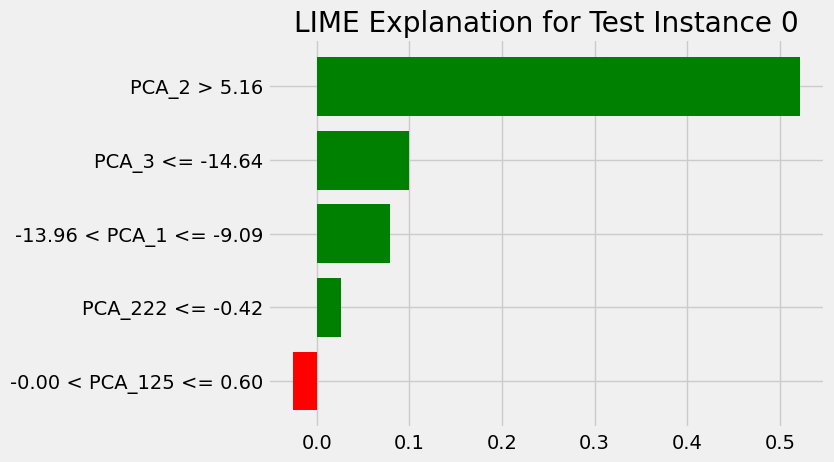


Explanation for test instance 1 (True label: meningioma, Predicted: meningioma)
PCA_2 > 5.16: 0.5237
-9.09 < PCA_1 <= -3.00: 0.1075
-7.10 < PCA_3 <= 12.83: 0.0522
PCA_4 > 2.98: 0.0518
PCA_10 > 2.16: 0.0265


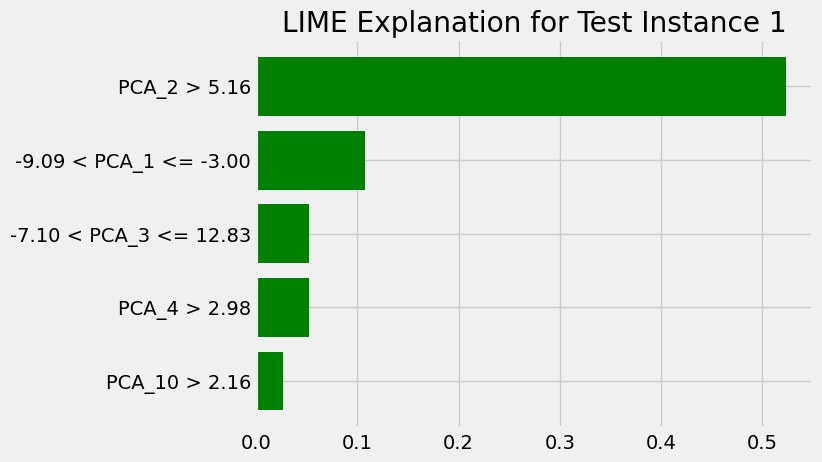


Explanation for test instance 2 (True label: glioma, Predicted: glioma)
PCA_1 > -3.00: -0.2459
-20.01 < PCA_2 <= -1.62: -0.2457
-7.10 < PCA_3 <= 12.83: 0.0792
-0.36 < PCA_257 <= -0.01: -0.0346
-0.76 < PCA_77 <= -0.02: 0.0303


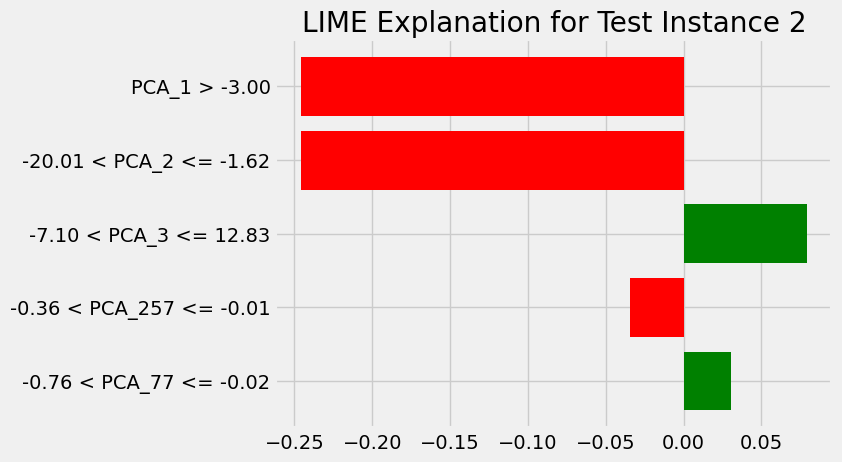

In [40]:
# Create feature names for PCA components
feature_names = [f'PCA_{i+1}' for i in range(X_train_pca.shape[1])]

# Initialize LIME explainer for tabular data
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_pca,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    random_state=42
)

# Explain a few test instances (e.g., first 3 test samples)
print("LIME Explanations for Selected Test Instances:")
for idx in range(min(3, len(X_test_pca))):
    exp = lime_explainer.explain_instance(
        data_row=X_test_pca[idx],
        predict_fn=svm.predict_proba,
        num_features=5
    )
    print(f"\nExplanation for test instance {idx} (True label: {class_names[y_test[idx]]}, Predicted: {class_names[y_pred_final[idx]]})")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")
    # Plot the explanation
    exp.as_pyplot_figure()
    plt.title(f'LIME Explanation for Test Instance {idx}')
    plt.show()


### LIME Interpretations for SVM Predictions

#### Test Instance 0 (True: Meningioma, Predicted: Meningioma)
- **PCA_2 > 5.16 (0.5214)**: High PCA_2 strongly favors meningioma, a dominant feature for this prediction.
- **PCA_3 <= -14.64 (0.0999)**: Very low PCA_3 supports meningioma, indicating a key pattern.
- **PCA_1 in [-13.96, -9.09] (0.0796)**: Low to moderate PCA_1 aids meningioma classification.
- **PCA_222 <= -0.42 (0.0261)**: Low PCA_222 slightly supports meningioma.
- **PCA_125 in [-0.00, 0.60] (-0.0252)**: Moderate PCA_125 slightly opposes meningioma but is outweighed.
- **Summary**: High PCA_2 and very low PCA_3 drive the correct meningioma prediction, with low PCA_1 adding support.

#### Test Instance 1 (True: Meningioma, Predicted: Meningioma)
- **PCA_2 > 5.16 (0.5237)**: High PCA_2 is the primary driver for meningioma, consistent with instance 0.
- **PCA_1 in [-9.09, -3.00] (0.1075)**: Moderate PCA_1 supports meningioma, reinforcing its role.
- **PCA_3 in [-7.10, 12.83] (0.0522)**: Moderate PCA_3 aids meningioma prediction.
- **PCA_4 > 2.98 (0.0518)**: High PCA_4 supports meningioma, indicating a relevant feature.
- **PCA_10 > 2.16 (0.0265)**: High PCA_10 slightly favors meningioma.
- **Summary**: High PCA_2 and moderate PCA_1 are key to the correct meningioma prediction, with moderate PCA_3 and high PCA_4 adding support.

#### Test Instance 2 (True: Glioma, Predicted: Glioma)
- **PCA_1 > -3.00 (-0.2459)**: High PCA_1 reduces glioma likelihood, suggesting low PCA_1 favors glioma.
- **PCA_2 in [-20.01, -1.62] (-0.2457)**: Low to moderate PCA_2 opposes glioma, indicating high PCA_2 may favor glioma.
- **PCA_3 in [-7.10, 12.83] (0.0792)**: Moderate PCA_3 supports glioma, contrasting its role in meningioma.
- **PCA_257 in [-0.36, -0.01] (-0.0346)**: Moderate PCA_257 slightly reduces glioma likelihood.
- **PCA_77 in [-0.76, -0.02] (0.0303)**: Moderate PCA_77 slightly supports glioma.
- **Summary**: Moderate PCA_3 drives the correct glioma prediction, while high PCA_1 and low PCA_2 oppose it but are outweighed.

### Key Insights
- **PCA_2**: High values strongly favor meningioma, low to moderate values reduce glioma likelihood.
- **PCA_3**: Very low values favor meningioma, moderate values support glioma.
- **PCA_1**: Low to moderate values aid meningioma, high values oppose glioma.
- **Higher-order PCA components (e.g., PCA_222, PCA_257)** have minor, mixed roles.

**SHAP Explanations (Local and Global Interpretability)**

  0%|          | 0/50 [00:00<?, ?it/s]


SHAP Summary Plot (Global Feature Importance):


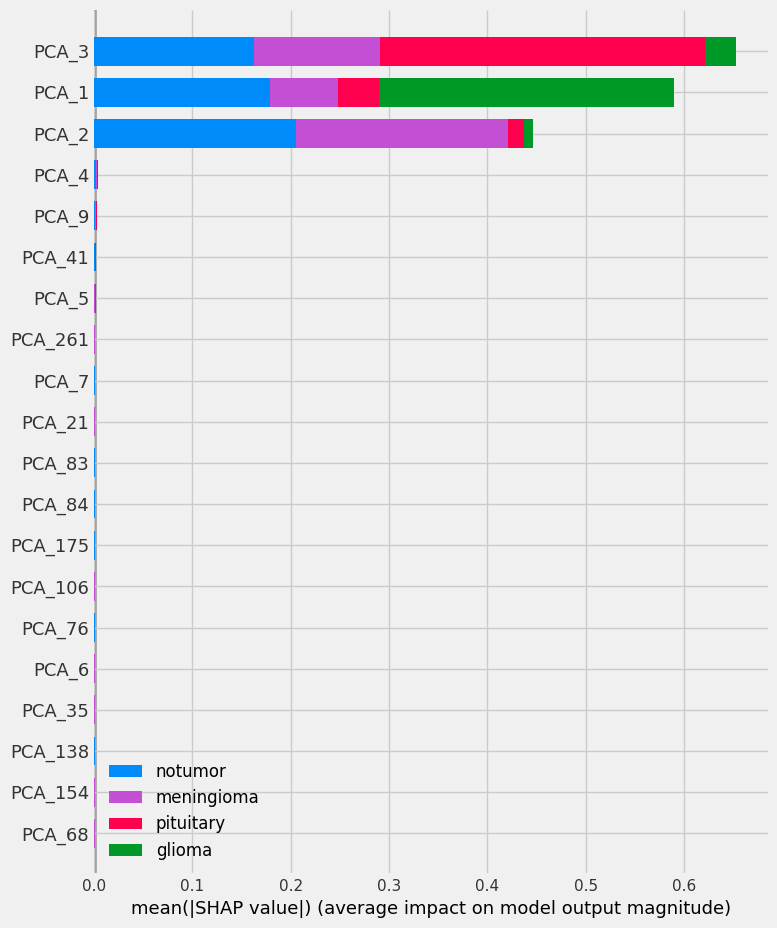


SHAP Explanation for Test Instance 0:


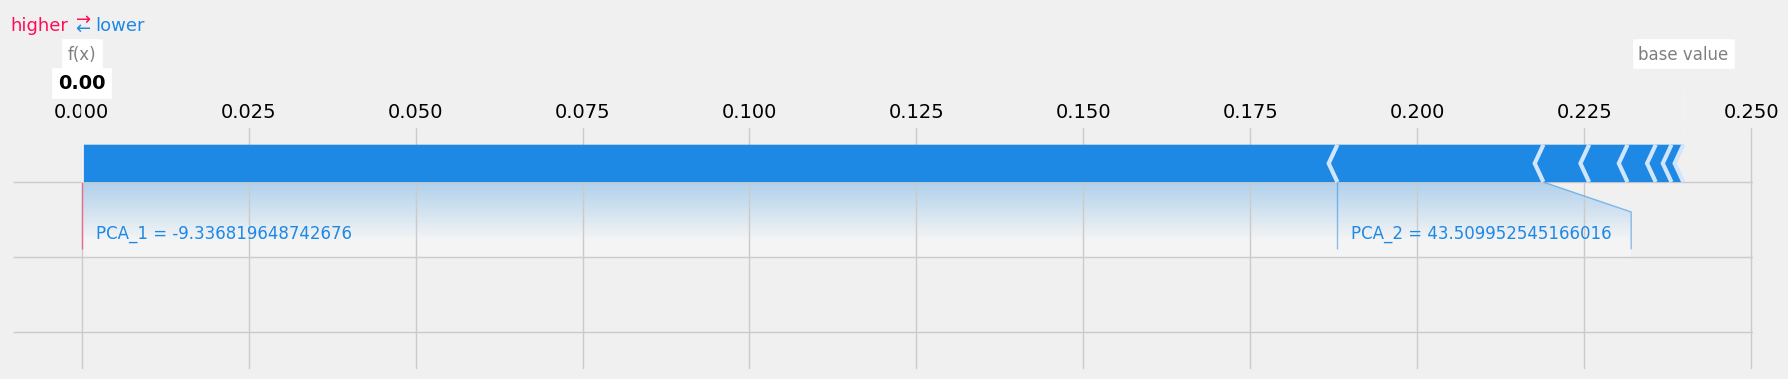

In [42]:
background_data = X_train_pca[np.random.choice(X_train_pca.shape[0], 100, replace=False)]
shap_explainer = shap.KernelExplainer(svm.predict_proba, background_data)
shap_values = shap_explainer.shap_values(X_test_pca[:50], nsamples=180)
print("\nSHAP Summary Plot (Global Feature Importance):")
shap.summary_plot(shap_values, X_test_pca[:50], feature_names=feature_names, class_names=class_names, plot_type="bar")
plt.show()
print("\nSHAP Explanation for Test Instance 0:")
shap.force_plot(shap_explainer.expected_value[0], shap_values[0][0], X_test_pca[0], feature_names=feature_names, matplotlib=True)
plt.show()

### Interpretation of SHAP Results

#### SHAP Summary Plot (Global Feature Importance)
- **Top Features**:
  - **PCA_3**: Highest importance, with strong influence from pituitary (red) and glioma (green), indicating it captures key patterns for these classes.
  - **PCA_1**: Second most important, with notable contributions from notumor (blue), meningioma (purple), and glioma (green), suggesting a broad discriminative role.
  - **PCA_2**: High importance, dominated by glioma (green), highlighting its role in glioma classification.
- **Class-Specific Insights**:
  - **Glioma (Green)**: Strongest in PCA_2 and PCA_3, indicating these components are critical for glioma detection.
  - **Pituitary (Red)**: Dominant in PCA_3, suggesting it differentiates pituitary tumors.
  - **Meningioma (Purple)**: Present in PCA_1 and PCA_3, aiding meningioma classification.
  - **Notumor (Blue)**: Contributes to PCA_1, reflecting its role in identifying non-tumor cases.
- **Lower Features**: PCA_4 and beyond have minimal impact, with contributions spread thinly across classes.

#### SHAP Explanation for Test Instance 0
- **PCA_1 = -3.363910874276**: Low value increases the prediction (SHAP value contribution from 0.00 to 0.100), suggesting low PCA_1 favors the predicted class.
- **PCA_2 = 43.30992453160016**: High value significantly boosts the prediction (SHAP value from 0.100 to 0.225), indicating high PCA_2 strongly supports the class.
- **Base Value**: 0.250, representing the model's average prediction without feature contributions.
- **Summary**: For this instance, high PCA_2 has the largest positive impact, while low PCA_1 adds moderate support, leading to a final prediction higher than the base value.

### Key Insights
- Globally, PCA_3, PCA_1, and PCA_2 are the most influential features, with class-specific patterns (e.g., glioma in PCA_2, pituitary in PCA_3).
- Locally, for instance 0, high PCA_2 and low PCA_1 drive the prediction upward, aligning with their global importance but with class-specific weighting.

**PDP**


Partial Dependence Plots for Top PCA Components:


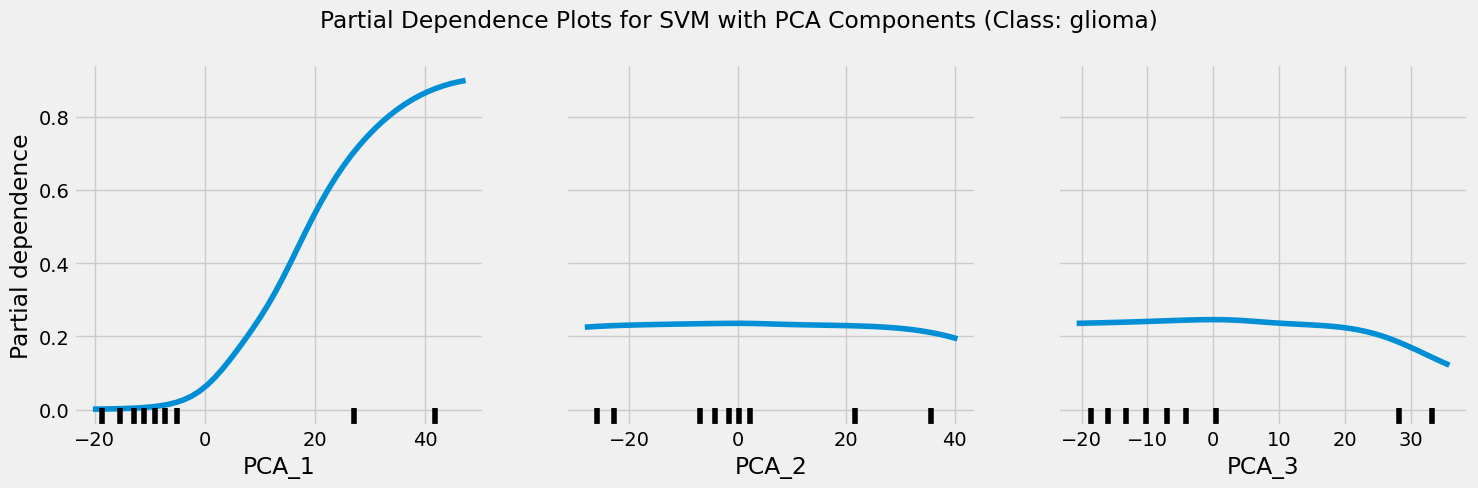

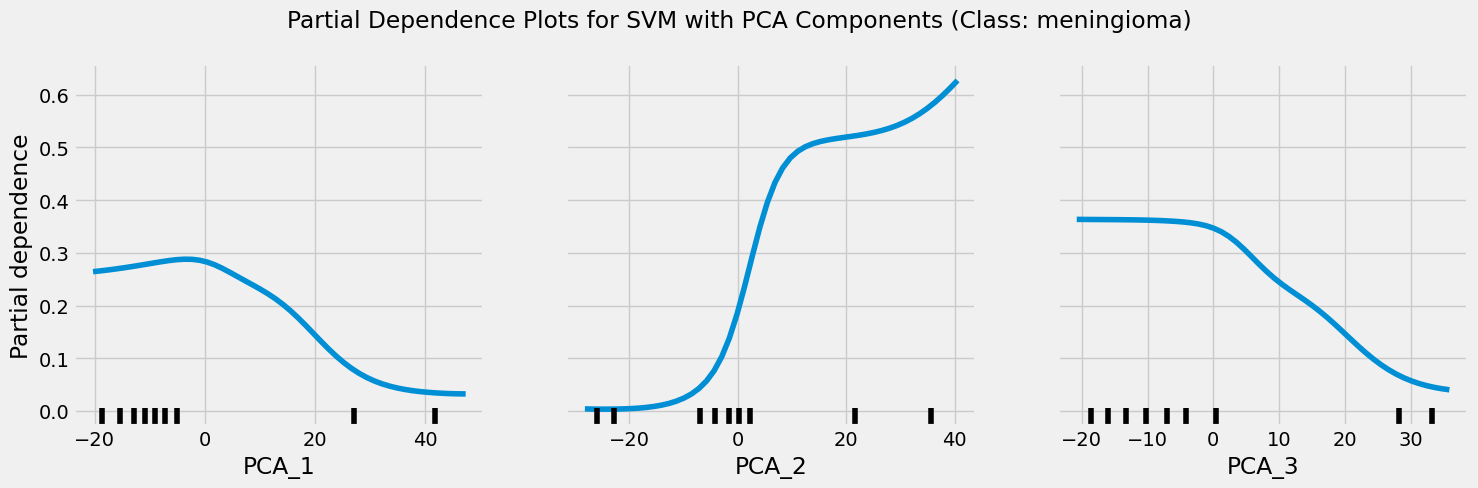

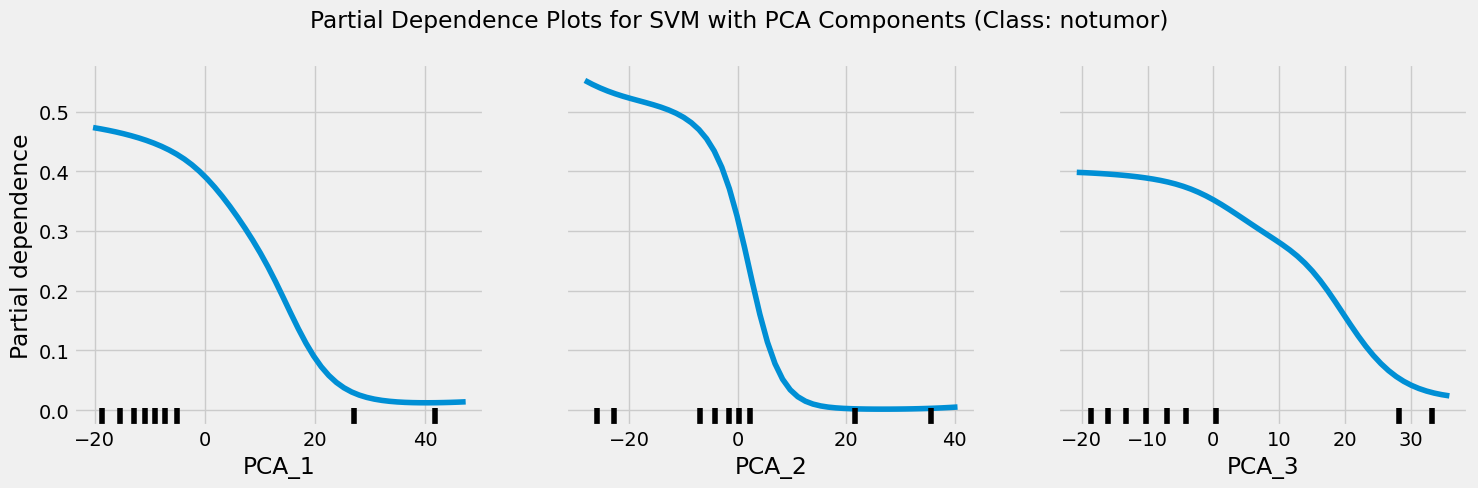

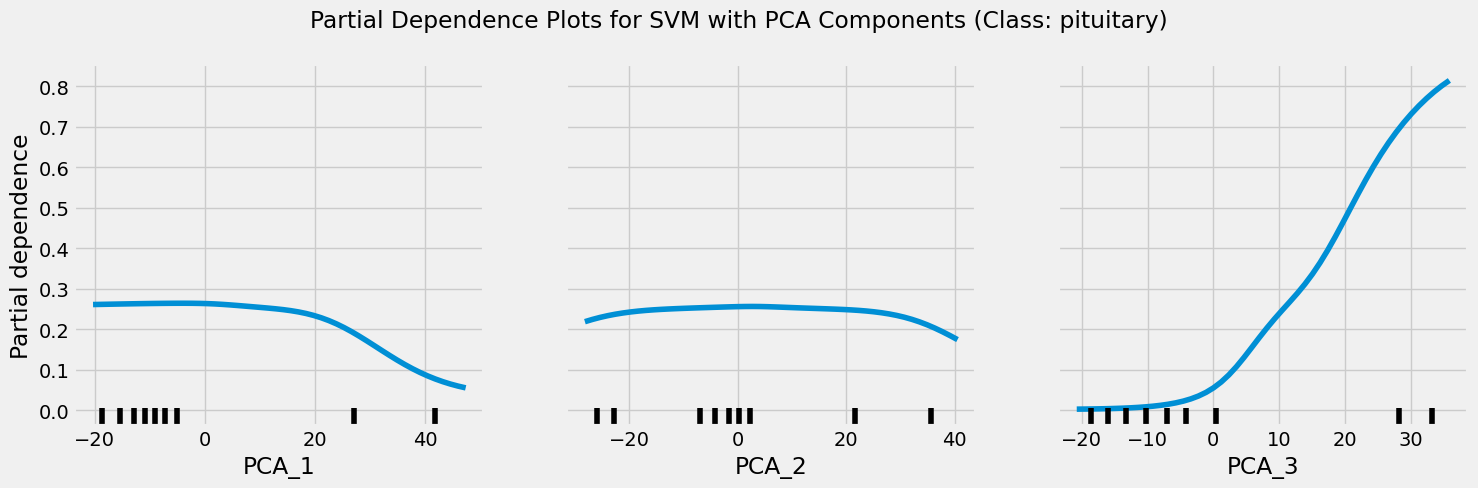

In [43]:
from sklearn.inspection import PartialDependenceDisplay
print("\nPartial Dependence Plots for Top PCA Components:")
features_to_plot = [0, 1, 2]  # Correspond to PCA_1, PCA_2, PCA_3
for class_idx, class_name in enumerate(class_names):
    fig, ax = plt.subplots(figsize=(15, 5))
    PartialDependenceDisplay.from_estimator(
        estimator=svm,
        X=X_train_pca,
        features=features_to_plot,
        feature_names=feature_names,
        target=class_idx,  # Specify the class index for multi-class
        grid_resolution=50,
        ax=ax
    )
    plt.suptitle(f'Partial Dependence Plots for SVM with PCA Components (Class: {class_name})')
    plt.tight_layout()
    plt.show()

### Interpretation of Partial Dependence Plots for SVM

#### Class: Glioma
- **PCA_1**: Increases sharply from 0 to 0.8 as PCA_1 rises from -20 to 40. Higher PCA_1 strongly favors glioma.
- **PCA_2**: Remains flat around 0.2 from -20 to 40, with minimal impact on glioma prediction.
- **PCA_3**: Slightly decreases from 0.3 to 0.1 as PCA_3 increases from -20 to 30, with higher values slightly reducing glioma likelihood.

#### Class: Meningioma
- **PCA_1**: Decreases from 0.3 to 0 as PCA_1 increases from -20 to 40. Low PCA_1 favors meningioma.
- **PCA_2**: Rises sharply from 0 to 0.5 as PCA_2 increases from -20 to 40. Higher PCA_2 strongly favors meningioma.
- **PCA_3**: Decreases from 0.3 to 0 as PCA_3 increases from -20 to 30, with low values supporting meningioma.

#### Class: Notumor
- **PCA_1**: Decreases from 0.5 to 0 as PCA_1 increases from -20 to 40. Low PCA_1 favors notumor.
- **PCA_2**: Decreases from 0.5 to 0 as PCA_2 increases from -20 to 40, with low values supporting notumor.
- **PCA_3**: Decreases from 0.4 to 0.1 as PCA_3 increases from -20 to 30, with low values favoring notumor.

#### Class: Pituitary
- **PCA_1**: Decreases from 0.3 to 0 as PCA_1 increases from -20 to 40. Low PCA_1 slightly favors pituitary.
- **PCA_2**: Slightly decreases from 0.3 to 0.1 as PCA_2 increases from -20 to 40, with minimal impact.
- **PCA_3**: Increases sharply from 0 to 0.7 as PCA_3 rises from -20 to 30. Higher PCA_3 strongly favors pituitary.

#### Summary
- **PCA_1**: High values favor glioma, low values favor meningioma, notumor, and pituitary.
- **PCA_2**: High values strongly favor meningioma and glioma, low values favor notumor.
- **PCA_3**: High values strongly favor pituitary, low values favor meningioma and notumor, with slight negative impact on glioma.

In [44]:
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

**Permutaation Importance**


Permutation Importance for PCA Components:


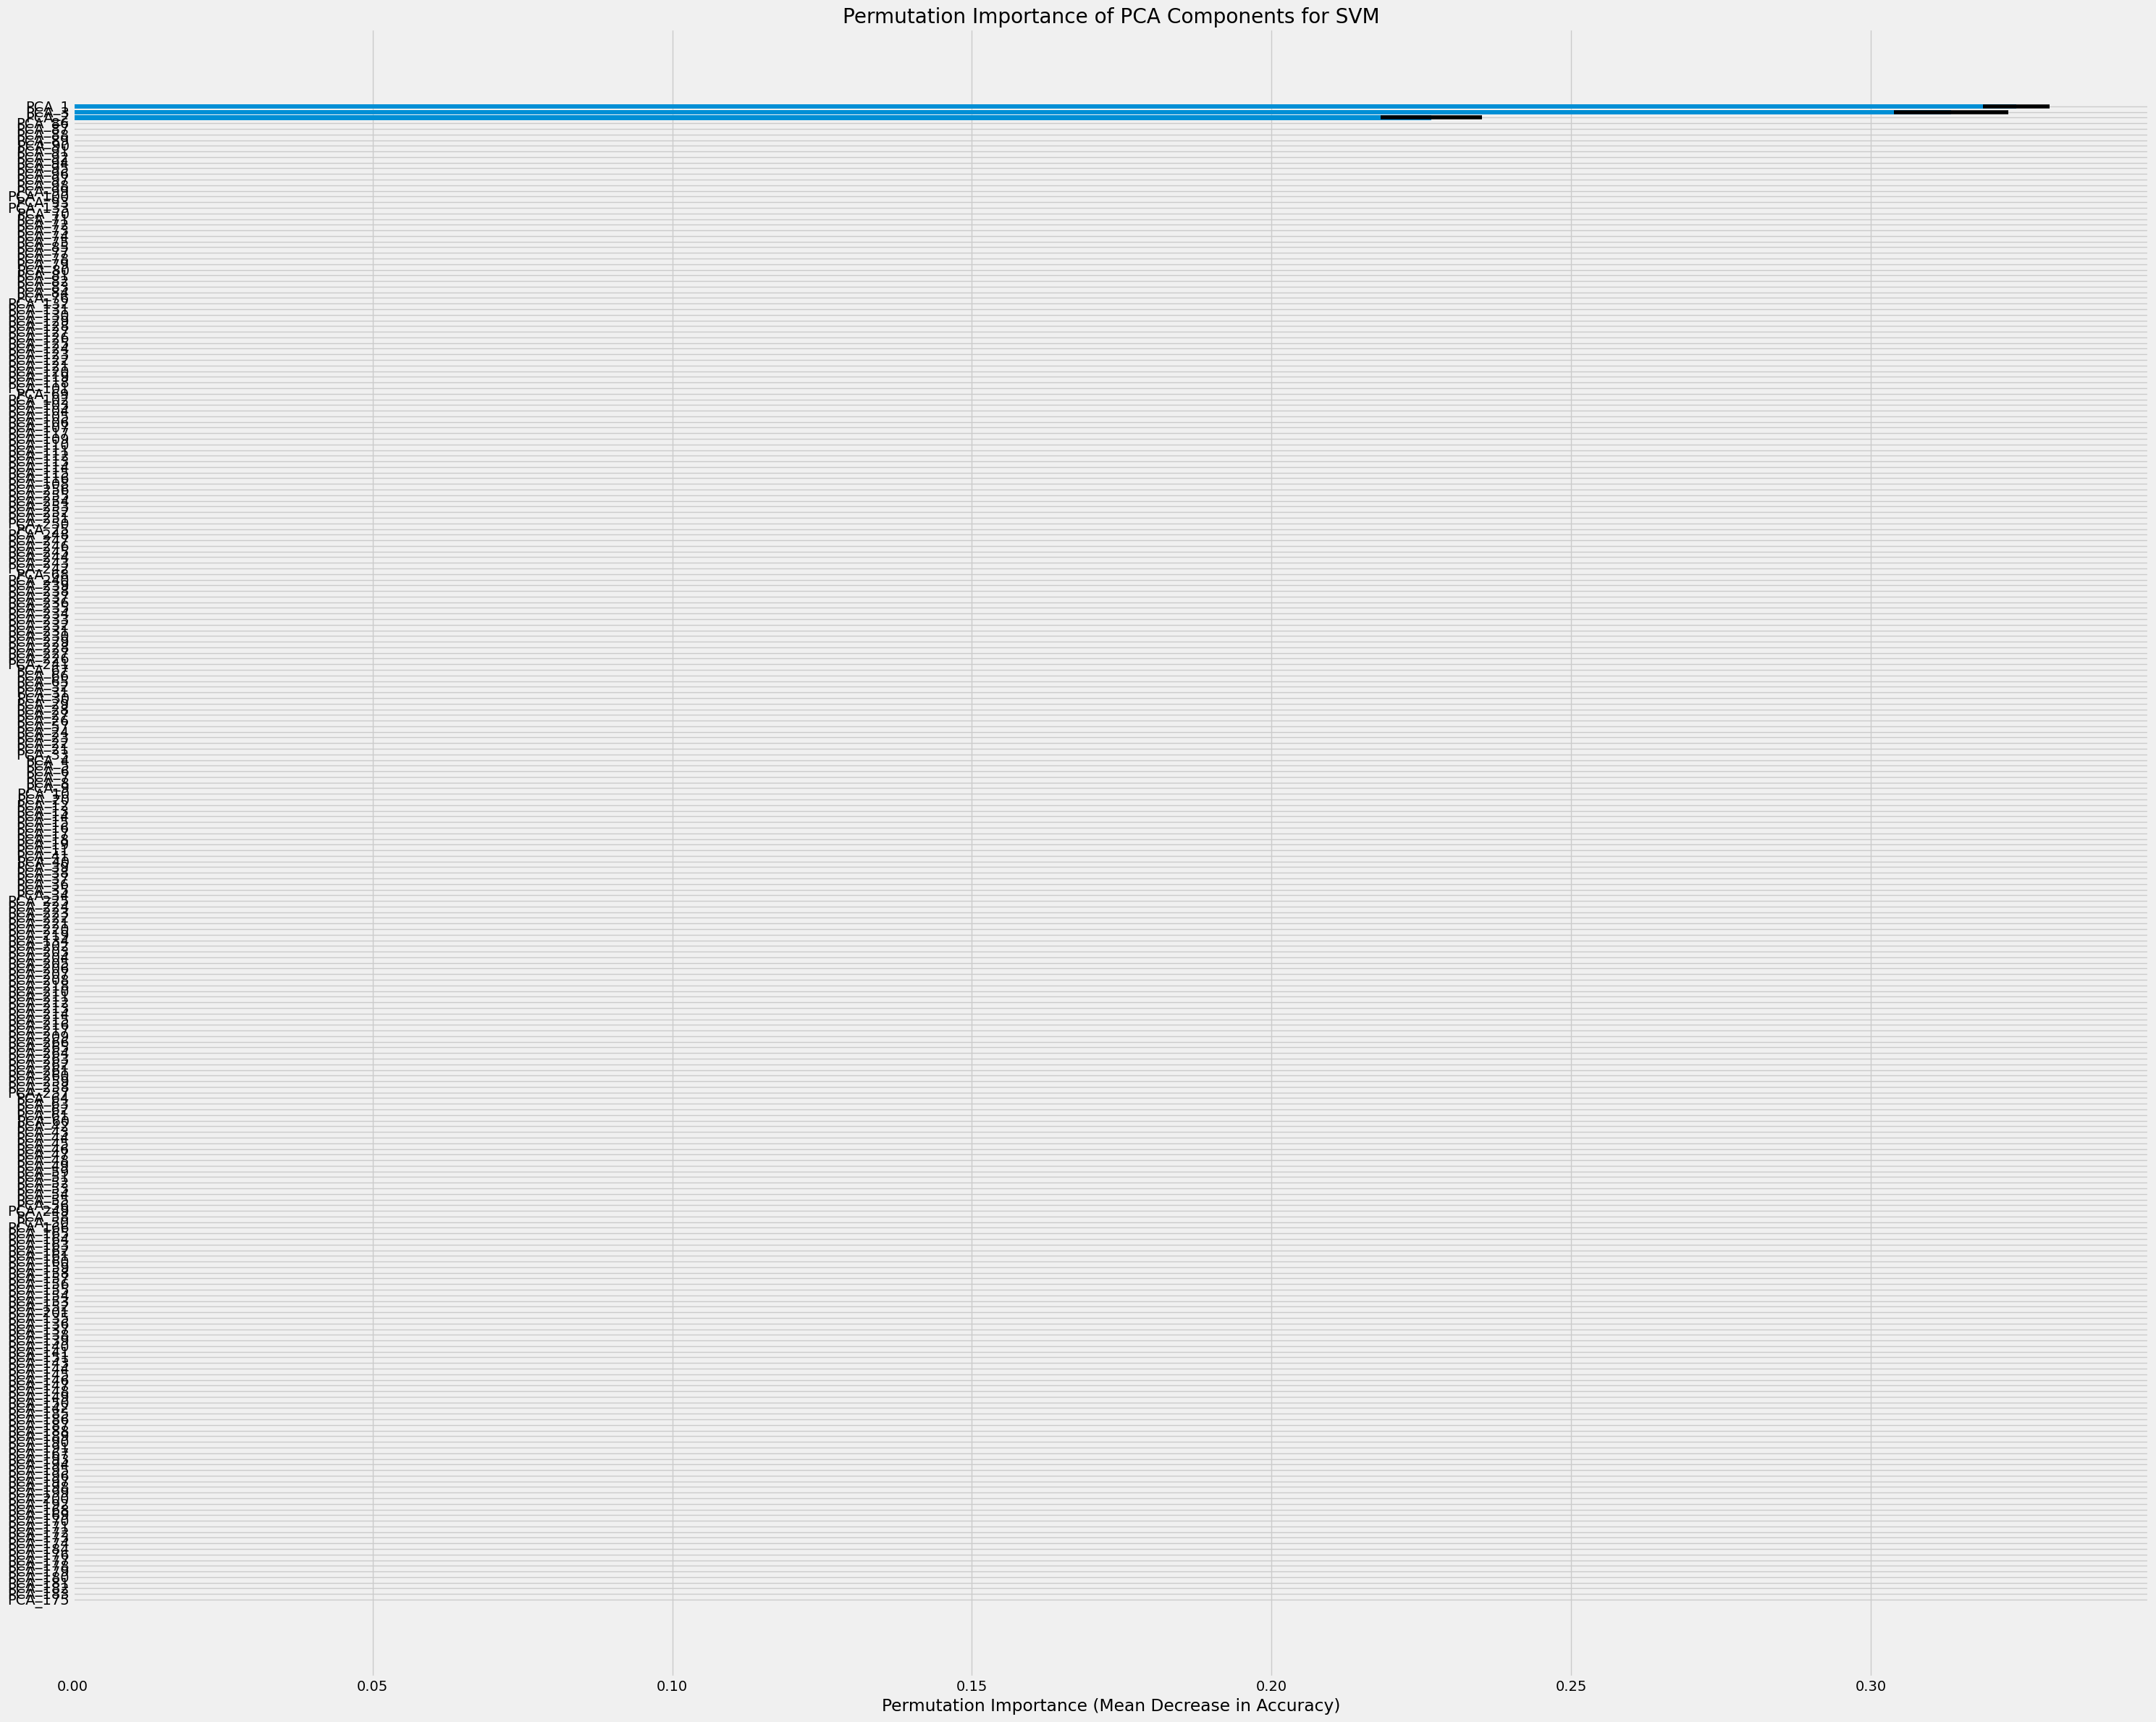

Permutation Importance Values:
PCA_1: 0.3243 ± 0.0056
PCA_3: 0.3134 ± 0.0096
PCA_2: 0.2267 ± 0.0085
PCA_86: 0.0000 ± 0.0000
PCA_87: 0.0000 ± 0.0000
PCA_88: 0.0000 ± 0.0000
PCA_89: 0.0000 ± 0.0000
PCA_90: 0.0000 ± 0.0000
PCA_91: 0.0000 ± 0.0000
PCA_92: 0.0000 ± 0.0000
PCA_94: 0.0000 ± 0.0000
PCA_95: 0.0000 ± 0.0000
PCA_96: 0.0000 ± 0.0000
PCA_97: 0.0000 ± 0.0000
PCA_98: 0.0000 ± 0.0000
PCA_99: 0.0000 ± 0.0000
PCA_100: 0.0000 ± 0.0000
PCA_93: 0.0000 ± 0.0000
PCA_133: 0.0000 ± 0.0000
PCA_70: 0.0000 ± 0.0000
PCA_71: 0.0000 ± 0.0000
PCA_72: 0.0000 ± 0.0000
PCA_73: 0.0000 ± 0.0000
PCA_74: 0.0000 ± 0.0000
PCA_75: 0.0000 ± 0.0000
PCA_85: 0.0000 ± 0.0000
PCA_77: 0.0000 ± 0.0000
PCA_78: 0.0000 ± 0.0000
PCA_79: 0.0000 ± 0.0000
PCA_80: 0.0000 ± 0.0000
PCA_81: 0.0000 ± 0.0000
PCA_82: 0.0000 ± 0.0000
PCA_83: 0.0000 ± 0.0000
PCA_84: 0.0000 ± 0.0000
PCA_76: 0.0000 ± 0.0000
PCA_132: 0.0000 ± 0.0000
PCA_131: 0.0000 ± 0.0000
PCA_130: 0.0000 ± 0.0000
PCA_129: 0.0000 ± 0.0000
PCA_128: 0.0000 ± 0.0000
PCA_1

In [45]:
print("\nPermutation Importance for PCA Components:")
perm_importance = permutation_importance(svm, X_test_pca, y_test, n_repeats=10, random_state=42, n_jobs=-1)
# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()
# Plot permutation importance
plt.figure(figsize=(30, 24))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance (Mean Decrease in Accuracy)')
plt.title('Permutation Importance of PCA Components for SVM')
plt.tight_layout()
plt.show()
# Print permutation importance values
print("Permutation Importance Values:")
for i in sorted_idx[::-1]:  # Print in descending order
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

### Interpretation of Permutation Importance Values

- **Top Features**:
  - **PCA_1 (0.3243 ± 0.0056)**: Highest importance, significantly impacts performance, capturing primary patterns in MRI data.
  - **PCA_3 (0.3134 ± 0.0096)**: Second most important, crucial for classification, likely distinguishing specific tumor types.
  - **PCA_2 (0.2267 ± 0.0085)**: High importance, plays a key role in differentiation, though less than PCA_1 and PCA_3.

- **Negligible Features**:
  - **PCA_4 to PCA_266 (0.0000 ± 0.0000)**: Most components, starting from PCA_4, have zero importance, indicating they are irrelevant to the model's performance.

- **Summary**:
  The SVM model relies heavily on PCA_1, PCA_3, and PCA_2 for accurate classification, with these components capturing the most discriminative patterns in the data. Higher-order components (e.g., PCA_4 onward) have no impact, suggesting they contribute little to the model's predictive power.